In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
houses = pd.read_csv('data/train.csv')

In [3]:
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# EDA

In [4]:
houses.shape

(1460, 81)

In [5]:
houses.isnull().sum().sum()

6965

In [6]:
houses.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

#### MSSubClass (type of building)

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

In [7]:
## no missing values here
houses['MSSubClass'].isnull().sum()

0

In [8]:
houses['MSSubClass'].value_counts().sort_values()

40       4
180     10
45      12
75      16
85      20
190     30
90      52
80      58
70      60
160     63
30      69
120     87
50     144
60     299
20     536
Name: MSSubClass, dtype: int64

#### MSZoning

       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

In [9]:
## no industrial zoned houses
## no agricultural
## no residential low density park

houses['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [10]:
list(set(houses['MSZoning']))

['RL', 'RM', 'RH', 'FV', 'C (all)']

#### Lot Frontage

In [11]:
## 259 rows without lot frontage or without lot frontage data
## these are either missing data or they just don't have connected street (maybe they're apartments?)
houses['LotFrontage'].isnull().sum()

259

In [12]:
no_frontage = houses[houses['LotFrontage'].isnull()==True]

In [13]:
## zoning types for sales without lot frontage data present
no_frontage['MSZoning'].value_counts()

RL    229
RM     19
FV      8
RH      3
Name: MSZoning, dtype: int64

In [14]:
## house type for sales without lot frontage data
no_frontage['MSSubClass'].value_counts()

20     99
60     69
120    20
80     20
50     16
160     8
85      6
30      6
90      5
70      5
190     3
75      1
40      1
Name: MSSubClass, dtype: int64

(array([ 205.,  643.,  298.,   40.,    9.,    4.,    0.,    0.,    0.,    2.]),
 array([  21. ,   50.2,   79.4,  108.6,  137.8,  167. ,  196.2,  225.4,
         254.6,  283.8,  313. ]),
 <a list of 10 Patch objects>)

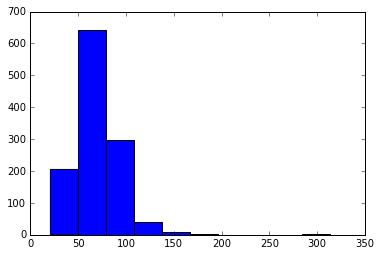

In [15]:
## histogram of linear feet of street connected to property
plt.hist(houses['LotFrontage'].dropna())

#### LotArea (lot size in square feet)

actual numerical data

(array([ 506.,  840.,   77.,   14.,    8.,    2.,    3.,    4.,    1.,
           1.,    0.,    0.,    0.,    0.,    0.,    1.,    0.,    0.,
           0.,    0.,    0.,    0.,    2.,    0.,    0.,    0.,    0.,
           0.,    0.,    1.]),
 array([   1300. ,    8431.5,   15563. ,   22694.5,   29826. ,   36957.5,
          44089. ,   51220.5,   58352. ,   65483.5,   72615. ,   79746.5,
          86878. ,   94009.5,  101141. ,  108272.5,  115404. ,  122535.5,
         129667. ,  136798.5,  143930. ,  151061.5,  158193. ,  165324.5,
         172456. ,  179587.5,  186719. ,  193850.5,  200982. ,  208113.5,
         215245. ]),
 <a list of 30 Patch objects>)

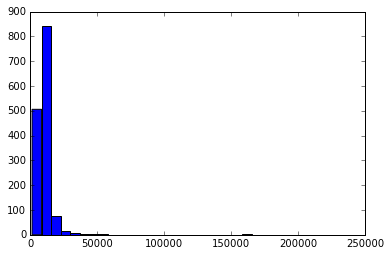

In [16]:
plt.hist(houses['LotArea'], bins=30)

(array([  31.,   48.,  131.,  640.,  528.,   58.,   12.,    8.,    1.,    3.]),
 array([  7.17011954,   7.68106081,   8.19200207,   8.70294334,
          9.2138846 ,   9.72482587,  10.23576713,  10.7467084 ,
         11.25764966,  11.76859093,  12.27953219]),
 <a list of 10 Patch objects>)

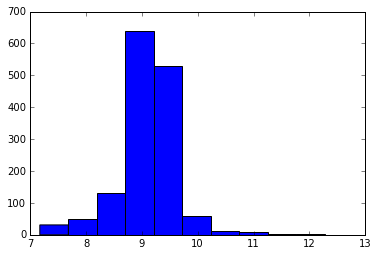

In [17]:
## log transform may be better than raw data
plt.hist(np.log(houses['LotArea']))

In [18]:
houses['LotArea'].describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

In [19]:
## could leave as-is or log-transform

#### Street (paved or gravel road attached to lot)

In [20]:
houses['Street'].isnull().sum()

0

In [21]:
## There are so few gravel streets that it might be better just to leave this one out
houses['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

#### Alley (type of alley access to property)

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access

In [22]:
houses['Alley'].isnull().sum()

1369

In [23]:
houses['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

### LotShape (general shape of property)

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular

In [24]:
## All basically regular shapes. Should probably group all irregular together. 
## option 1: group all irregular together
## option 2: group IR2 and IR3 together, and leave Reg and IR1 as is
houses['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

#### LandContour (land flatness)

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression

In [25]:
## maybe group together all non-level properties

houses['LandContour'].value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

In [26]:
houses['LandContour'].isnull().sum()

0

#### Utilities

       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	

In [27]:
## nothing to see here

houses['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [28]:
houses['Utilities'].isnull().sum()

0

#### LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property

In [29]:
## maybe group FR2 and FR3

houses['LotConfig'].value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [30]:
houses['LotConfig'].isnull().sum()

0

#### LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope

In [31]:
houses['LandSlope'].isnull().sum()

0

In [32]:
## group all slopes?

houses['LandSlope'].value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

#### Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker

In [33]:
houses['Neighborhood'].isnull().sum()

0

In [34]:
## I could dummy all of these, or just the ones above 40 or 50

houses['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

#### Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

In [35]:
houses['Condition1'].isnull().sum()

0

In [36]:
## I can combine all of the railroad conditions (45 total)
## keep norm, Feedr and Artery as is?
## code HasNegFeatures (if it has any negative feature)
## code HasPosFeatures (if it has any positive features)

houses['Condition1'].value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

#### Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

In [37]:
## this refers to so few houses that it's probably not worth using

houses['Condition2'].value_counts()

Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
RRAn         1
RRAe         1
PosA         1
Name: Condition2, dtype: int64

In [38]:
houses['Condition2'].isnull().sum()

0

#### BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit

In [39]:
houses['BldgType'].isnull().sum()

0

In [40]:
## looks like I can just dummy these out?

houses['BldgType'].value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

#### HouseStyle: Style of dwelling
	
   
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

In [41]:
houses['HouseStyle'].isnull().sum()

0

In [42]:
## can definitely keep 1Story, 2Story and 1.5Fin. The rest are marginal.

houses['HouseStyle'].value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

#### OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

In [49]:
## can keep this as-is (numeric)

In [45]:
houses['OverallQual'].value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

(array([   2.,    3.,   20.,  116.,  397.,  374.,  319.,  168.,   43.,   18.]),
 array([  1. ,   1.9,   2.8,   3.7,   4.6,   5.5,   6.4,   7.3,   8.2,
          9.1,  10. ]),
 <a list of 10 Patch objects>)

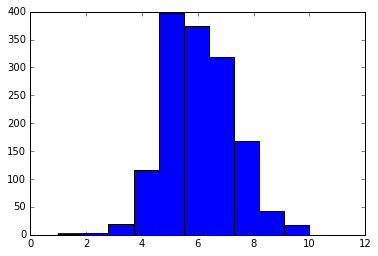

In [48]:
plt.hist(houses['OverallQual'])

#### OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor

(array([   1.,    5.,   25.,   57.,    0.,  821.,  252.,  205.,   72.,   22.]),
 array([ 1. ,  1.8,  2.6,  3.4,  4.2,  5. ,  5.8,  6.6,  7.4,  8.2,  9. ]),
 <a list of 10 Patch objects>)

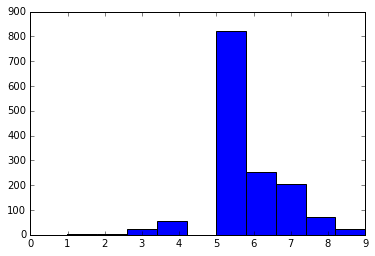

In [50]:
plt.hist(houses['OverallCond'])

In [52]:
## pretty surprising that these don't correlate
houses[['OverallCond', 'OverallQual']].corr()

,OverallCond,OverallQual
OverallCond,1.000000,-0.091932
OverallQual,-0.091932,1.000000


# Feature Creation

In [43]:
## house type dummy variables (MSSubClass)
## zoning dummy variables (MSZoning)


# Modeling

In [44]:
## try linear regression, random forest, extra trees, gradient boost, adaboost